In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [11]:
ds = '/Users/macbook/Mirror/JupyterProjects/Personal_projects/Leukemia_data'

In [12]:
for dirname, _, filenames in os.walk(ds):
    for filename in filenames:
        print(dirname)
        print(f"Total number of files in this folder: {len(filenames)} \n")
        break

In [13]:
total_all = 0
total_hem = 0
for dirname, _, filenames in os.walk(ds):
    for filename in filenames:
        all_count = 0
        hem_count = 0
        if "training" in dirname:
            if "all" in dirname:
                all_count = len(filenames)
            elif "hem" in dirname:
                hem_count = len(filenames)
            total_all += all_count
            total_hem += hem_count
            break
print(f"(Normal) Cell Count {total_hem} \n(Leukemia) Cell Count {total_all}")

(Normal) Cell Count 0 
(Leukemia) Cell Count 0


In [14]:
counts = [total_all, total_hem]
event = ['Leukemia','Normal']

<BarContainer object of 2 artists>

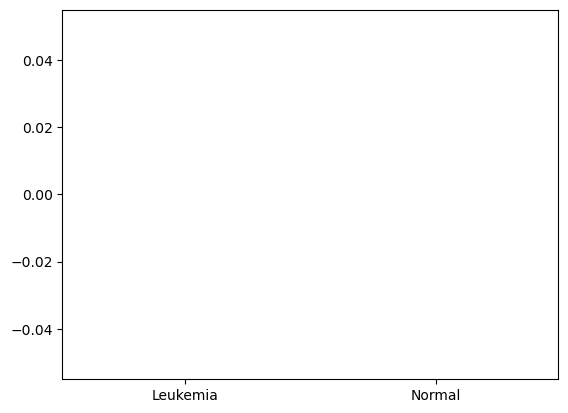

In [15]:
plt.bar(height=counts, x=event)

In [16]:
# Clearly the dataset is not balanced

In [17]:
train0_norm = '/Users/macbook/Mirror/JupyterProjects/Projects/Leukemia_data/training_data/fold_0/hem'
train0_leuk = '/Users/macbook/Mirror/JupyterProjects/Projects/Leukemia_data/training_data/fold_0/all'
train1_norm = '/Users/macbook/Mirror/JupyterProjects/Projects/Leukemia_data/training_data/fold_1/hem'
train1_leuk = '/Users/macbook/Mirror/JupyterProjects/Projects/Leukemia_data/training_data/fold_1/all'
train2_norm = '/Users/macbook/Mirror/JupyterProjects/Projects/Leukemia_data/training_data/fold_2/hem'
train2_leuk = '/Users/macbook/Mirror/JupyterProjects/Projects/Leukemia_data/training_data/fold_2/all'

In [18]:
dirs = [train0_norm,train0_leuk,train1_norm,train1_leuk,train2_norm,train2_leuk]
image_labels = []
image_paths = []
for i in dirs:
    images = os.listdir(i)
    for image_path in images:
        if 'all' in i:
            image_label = 1
        else:
            image_label = 0
        image_paths.append(i+'/'+image_path)
        image_labels.append(image_label)
data_dict = {'Image Paths':image_paths,'Image Labels':image_labels}
train_paths = pd.DataFrame(data_dict)

In [19]:
train_paths

,Image Paths,Image Labels
0,/Users/macbook/Mirror/JupyterProjects/Projects...,0
1,/Users/macbook/Mirror/JupyterProjects/Projects...,0
2,/Users/macbook/Mirror/JupyterProjects/Projects...,0
3,/Users/macbook/Mirror/JupyterProjects/Projects...,0
4,/Users/macbook/Mirror/JupyterProjects/Projects...,0
...,...,...
10656,/Users/macbook/Mirror/JupyterProjects/Projects...,1
10657,/Users/macbook/Mirror/JupyterProjects/Projects...,1
10658,/Users/macbook/Mirror/JupyterProjects/Projects...,1
10659,/Users/macbook/Mirror/JupyterProjects/Projects...,1


In [20]:
train_paths.iloc[1][0]

'/Users/macbook/Mirror/JupyterProjects/Projects/Leukemia_data/training_data/fold_0/hem/UID_H15_21_1_hem.bmp'

In [21]:
train_paths.iloc[1][1]

0

In [22]:
# Now we have obtained the labels for each of the images correctly

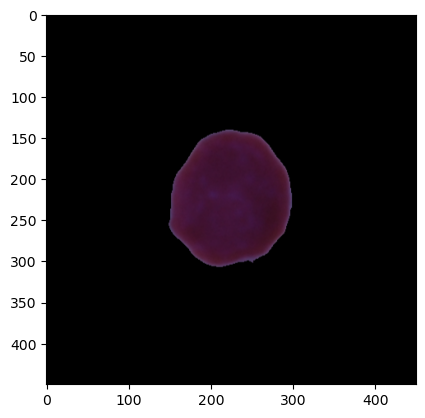

In [23]:
# Displaying an image that is normal
impath = train_paths.iloc[1][0]
im = cv.imread(impath)
plt.imshow(im)

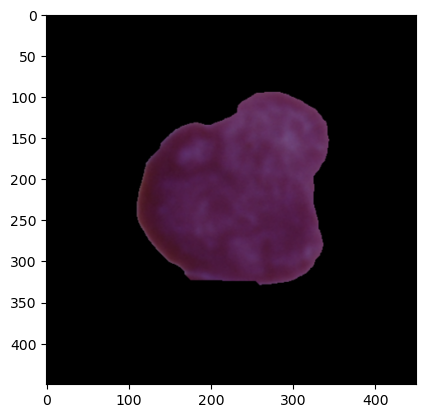

In [24]:
# Displaying an image that is affected
impath = train_paths.iloc[10660][0]
im = cv.imread(impath)
plt.imshow(im)

In [25]:
# it would be better to remove the extra black parts
# as they do not really contribute any useful data

In [26]:
def CropImage(image_path):
    image = cv.imread(image_path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
    
    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255] 
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    
    crop_img = image[mnx:mxx,mny:mxy,:]
    return crop_img

In [27]:
im = CropImage(train_paths['Image Paths'][0])

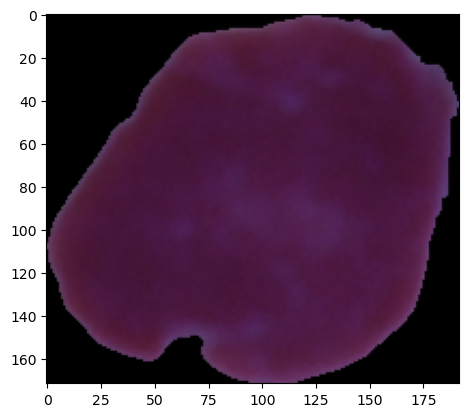

In [28]:
# The Image after cropping the extra parts
plt.imshow(im)

In [29]:
# We are able to crop images to remove unnescessary black parts

In [30]:
# Importing and formatting the validation dataset

In [31]:
val = pd.read_csv('validation_data/C-NMC_test_prelim_phase_data_labels.csv')
val.head()

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1


In [32]:
val_paths = []
paths = sorted(os.listdir('validation_data/C-NMC_test_prelim_phase_data'),key=lambda x: int(''.join(filter(str.isdigit, x))))
for i in paths:
    val_paths.append('validation_data/C-NMC_test_prelim_phase_data'+'/'+i)
val['Image Paths'] = val_paths
val.head()

,Patient_ID,new_names,labels,Image Paths
0,UID_57_29_1_all.bmp,1.bmp,1,validation_data/C-NMC_test_prelim_phase_data/1...
1,UID_57_22_2_all.bmp,2.bmp,1,validation_data/C-NMC_test_prelim_phase_data/2...
2,UID_57_31_3_all.bmp,3.bmp,1,validation_data/C-NMC_test_prelim_phase_data/3...
3,UID_H49_35_1_hem.bmp,4.bmp,0,validation_data/C-NMC_test_prelim_phase_data/4...
4,UID_58_6_13_all.bmp,5.bmp,1,validation_data/C-NMC_test_prelim_phase_data/5...


In [33]:
val['new_names'][11]

'12.bmp'

In [34]:
val['Image Paths'][11]


'validation_data/C-NMC_test_prelim_phase_data/12.bmp'

(172, 192, 3)

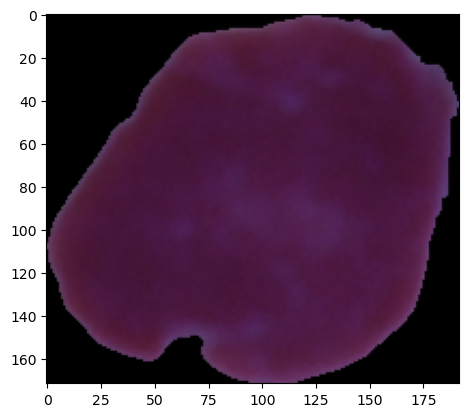

In [35]:
im = CropImage(train_paths['Image Paths'][0])
plt.imshow(im)
im.shape

(207, 165, 3)

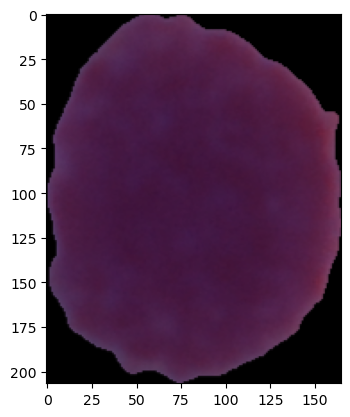

In [36]:
im2 = CropImage(train_paths['Image Paths'][8])
plt.imshow(im2)
im2.shape

In [37]:
def CropImage2(image_path,resize_x,resize_y):
    image = cv.imread(image_path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV)[1]
    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255] 
    (x, y, z_) = np.where(result > 0)
    minx = (np.min(x))
    maxx = (np.max(x))
    miny = (np.min(y))
    maxy = (np.max(y))
    crop_img = image[minx:maxx,miny:maxy,:]
    
    vborder = 0
    hborder = 0
    if (resize_y/resize_x) >= (crop_img.shape[0]/crop_img.shape[1]):
        vborder= int((((resize_y/resize_x)*crop_img.shape[1])-crop_img.shape[0])/2)
    else:
        hborder = int((((resize_y/resize_x)*crop_img.shape[0])-crop_img.shape[1])/2)
    
    crop_img = cv.copyMakeBorder(crop_img, vborder, vborder,
                                 hborder, hborder, cv.BORDER_CONSTANT, 0)
    resized_im = cv.resize(crop_img, (resize_x, resize_y))
    
    return resized_im

(200, 200, 3)

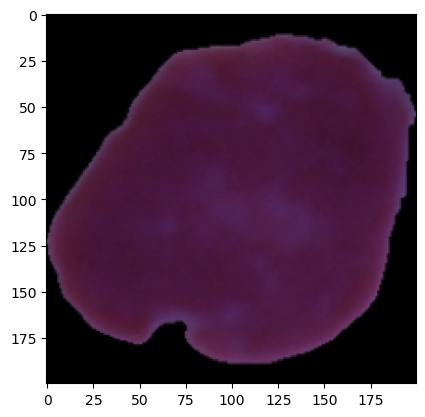

In [38]:
im3 = CropImage2(train_paths['Image Paths'][0],200,200)
plt.imshow(im3)
im3.shape

(200, 200, 3)

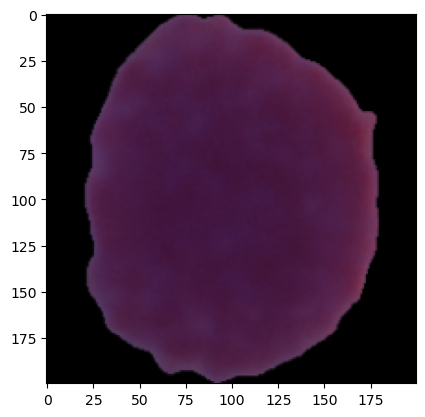

In [39]:
im4 = CropImage2(train_paths['Image Paths'][8],200,200)
plt.imshow(im4)
im4.shape

In [40]:
vborder = 441
hborder = 433

In [41]:
def Cropper(image_path):
    image = cv.imread(image_path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV)[1]
    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255] 
    (x, y, z_) = np.where(result > 0)
    minx = (np.min(x))
    maxx = (np.max(x))
    miny = (np.min(y))
    maxy = (np.max(y))
    crop_img = image[minx:maxx,miny:maxy,:]
    
    return crop_img

In [42]:
heights = []
widths = []
for i in train_paths['Image Paths']:
    im = Cropper(i)
    
    x = im.shape[1]
    y = im.shape[0]
    heights.append(y)
    widths.append(x)

h_w = [np.max(heights),np.max(widths)]
print(h_w)

[441, 433]


In [43]:
def Fixer(image_path,new_x,new_y):
    image = cv.imread(image_path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV)[1]
    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255] 
    (x, y, z_) = np.where(result > 0)
    minx = (np.min(x))
    maxx = (np.max(x))
    miny = (np.min(y))
    maxy = (np.max(y))
    crop_img = image[minx:maxx,miny:maxy,:]
    
    bg_color = [0,0,0]
    
    new_image = np.ones((new_y, new_x, 3), dtype=np.uint8) * bg_color
    x_offset = (new_x - crop_img.shape[1]) // 2
    y_offset = (new_y - crop_img.shape[0]) // 2
    
    new_image[y_offset:y_offset + crop_img.shape[0],
                  x_offset:x_offset + crop_img.shape[1]] = crop_img
    
    return new_image

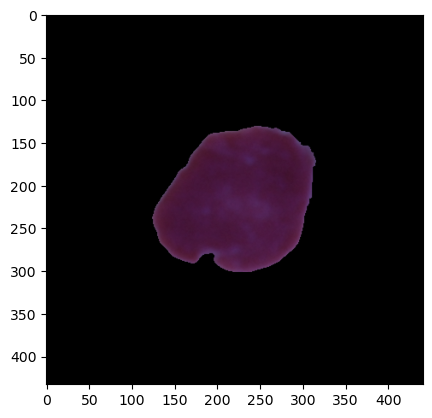

In [45]:
image = Fixer(train_paths['Image Paths'][0],h_w[0],h_w[1])
plt.imshow(image)

In [46]:
valheights = []
valwidths = []
for i in val['Image Paths']:
    im = Cropper(i)
    
    x = im.shape[1]
    y = im.shape[0]
    valheights.append(y)
    valwidths.append(x)

h_w_val = [np.max(valheights),np.max(valwidths)]
print(h_w_val)

[378, 364]


In [50]:
#train_paths.to_csv('train_paths.csv')
#val.to_csv('val_paths.csv')

In [48]:
# Now, we have saved the paths and labels to csv files to make the process easier

In [49]:
# In cropping the images, we could not get the images to unform dimensions any smaller
# than the existing size. We cannot reshape the images as the information
# in the images may be altered. 

# Therefore, we use the images as they are, but in greyscale to minimize the size of the data

In [51]:
# We can attempt to resize the images using the same aspect ratio using CropImage2 function
# Then we can compare the models built with resized and unresized images.